In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
ONU_game = pd.read_csv("Game 6-7.xlsx - Ohio Northern.csv")

In [3]:
ONU_game

,Session Title,Player Name,Minutes Played,Split Name,Player Name.1,Distance (miles),Player Name.2,Sprint Distance (yards),Player Name.3,Power Plays,...,Accelerations Zone Count: 3 - 4 m/s/s,Accelerations Zone Count: > 4 m/s/s,Deceleration Zone Count: 0 - 1 m/s/s,Deceleration Zone Count: 1 - 2 m/s/s,Deceleration Zone Count: 2 - 3 m/s/s,Deceleration Zone Count: 3 - 4 m/s/s,Deceleration Zone Count: > 4 m/s/s,Decel / Min G-7,Decel / Min G-7.1,Player Name.5
0,Ohio Northern,C,83.0,game,C,6.0575,C,175.0301,C,30,...,25.0,5.0,0.0,318.0,128.0,29.0,13.0,42,42.0,C
1,Ohio Northern,S,90.0,game,S,5.9055,S,265.9616,S,37,...,47.0,9.0,0.0,235.0,125.0,54.0,20.0,74,74.0,S
2,Ohio Northern,A,13.0,game,A,1.2198,A,134.6989,A,12,...,8.0,4.0,0.0,56.0,18.0,6.0,6.0,12,12.0,A
3,Ohio Northern,Q,61.0,game,Q,4.3789,Q,15.0579,Q,19,...,9.0,1.0,0.0,161.0,95.0,33.0,13.0,46,46.0,Q
4,Ohio Northern,Z,5.0,game,Z,0.5363,Z,2.4672,Z,4,...,2.0,1.0,0.0,26.0,13.0,10.0,4.0,14,14.0,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Ohio Northern,U,NaN,2nd.half,U,0.7099,U,81.2760,U,8,...,6.0,4.0,0.0,24.0,17.0,10.0,2.0,12,NaN,U
59,Ohio Northern,N,NaN,2nd.half,N,1.1974,N,47.4441,N,8,...,12.0,1.0,0.0,72.0,46.0,5.0,4.0,9,NaN,N
60,NaN,NaN,NaN,NaN,NaN,32.0000,NaN,2017.0000,NaN,221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350,NaN,NaN
61,NaN,NaN,NaN,NaN,NaN,0.0600,NaN,NaN,NaN,Team PP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Team Decel,NaN,NaN


In [4]:
ONU_full = ONU_game[ONU_game['Split Name']== 'game']
ONU_full

,Session Title,Player Name,Minutes Played,Split Name,Player Name.1,Distance (miles),Player Name.2,Sprint Distance (yards),Player Name.3,Power Plays,...,Accelerations Zone Count: 3 - 4 m/s/s,Accelerations Zone Count: > 4 m/s/s,Deceleration Zone Count: 0 - 1 m/s/s,Deceleration Zone Count: 1 - 2 m/s/s,Deceleration Zone Count: 2 - 3 m/s/s,Deceleration Zone Count: 3 - 4 m/s/s,Deceleration Zone Count: > 4 m/s/s,Decel / Min G-7,Decel / Min G-7.1,Player Name.5
0,Ohio Northern,C,83.0,game,C,6.0575,C,175.0301,C,30,...,25.0,5.0,0.0,318.0,128.0,29.0,13.0,42,42.0,C
1,Ohio Northern,S,90.0,game,S,5.9055,S,265.9616,S,37,...,47.0,9.0,0.0,235.0,125.0,54.0,20.0,74,74.0,S
2,Ohio Northern,A,13.0,game,A,1.2198,A,134.6989,A,12,...,8.0,4.0,0.0,56.0,18.0,6.0,6.0,12,12.0,A
3,Ohio Northern,Q,61.0,game,Q,4.3789,Q,15.0579,Q,19,...,9.0,1.0,0.0,161.0,95.0,33.0,13.0,46,46.0,Q
4,Ohio Northern,Z,5.0,game,Z,0.5363,Z,2.4672,Z,4,...,2.0,1.0,0.0,26.0,13.0,10.0,4.0,14,14.0,Z
5,Ohio Northern,I,14.0,game,I,1.1825,I,103.4708,I,11,...,4.0,2.0,0.0,37.0,26.0,13.0,6.0,19,19.0,I
6,Ohio Northern,O,48.0,game,O,2.3563,O,362.0221,O,23,...,24.0,6.0,0.0,111.0,42.0,25.0,8.0,33,33.0,O
7,Ohio Northern,P,80.0,game,P,5.0334,P,162.0358,P,39,...,38.0,5.0,0.0,151.0,70.0,33.0,21.0,54,54.0,P
8,Ohio Northern,X,45.0,game,X,1.6751,X,8.4700,X,2,...,18.0,2.0,0.0,40.0,37.0,15.0,6.0,21,21.0,X
9,Ohio Northern,R,19.0,game,R,1.4069,R,187.0762,R,15,...,6.0,3.0,0.0,52.0,29.0,17.0,3.0,20,20.0,R


In [5]:
ONU_volume_intensity = ONU_full[["Player Name", "Minutes Played", "Distance (miles)", "Sprint Distance (yards)", "Power Plays", "Energy (kcal)", "Impacts", "Top Speed (mph)","Distance Per Min (yd/min)", "Power Score (w/kg)", "Player Load", "Work Ratio"]]

In [6]:
ONU_cluster = ONU_volume_intensity.loc[:, ONU_volume_intensity.columns != 'Player Name']

In [7]:
ONU_distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(ONU_cluster)
    ONU_distortions.append(kmeanModel.inertia_)

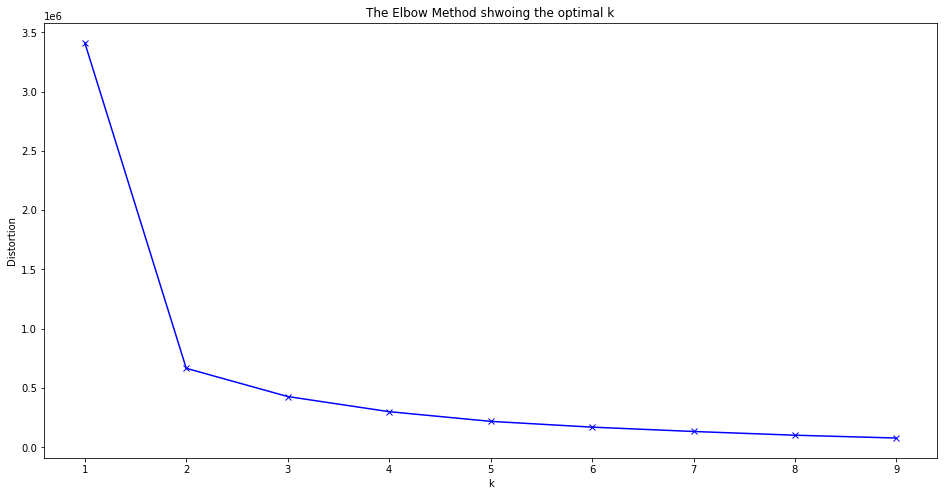

In [8]:
plt.figure(figsize=(16,8))
plt.plot(K, ONU_distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method shwoing the optimal k')
plt.show()

In [9]:
x_ONU = ONU_cluster.values # numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x_ONU)
X_norm = pd.DataFrame(x_scaled)

In [10]:
pca_ONU = PCA(n_components = 2) # 2D PCA for the plot
reduced_ONU = pd.DataFrame(pca_ONU.fit_transform(X_norm))

In [11]:
kmeans = KMeans(n_clusters=3)
# fit the input data
kmeans = kmeans.fit(reduced_ONU)
# get the cluster labels
labels = kmeans.predict(reduced_ONU)
# centroid values
centroid = kmeans.cluster_centers_
# cluster values
clusters = kmeans.labels_.tolist()
# adding names
ONU_names = ONU_full['Player Name']

In [12]:
reduced_ONU['cluster'] = clusters
reduced_ONU['names'] = ONU_names
reduced_ONU.columns = ['x', 'y', 'cluster', 'names']
reduced_ONU.head()

,x,y,cluster,names
0,1.293584,0.332409,0,C
1,1.257907,0.104422,0,S
2,-0.964114,-0.138553,1,A
3,0.335223,0.480999,2,Q
4,-1.403407,0.195146,1,Z


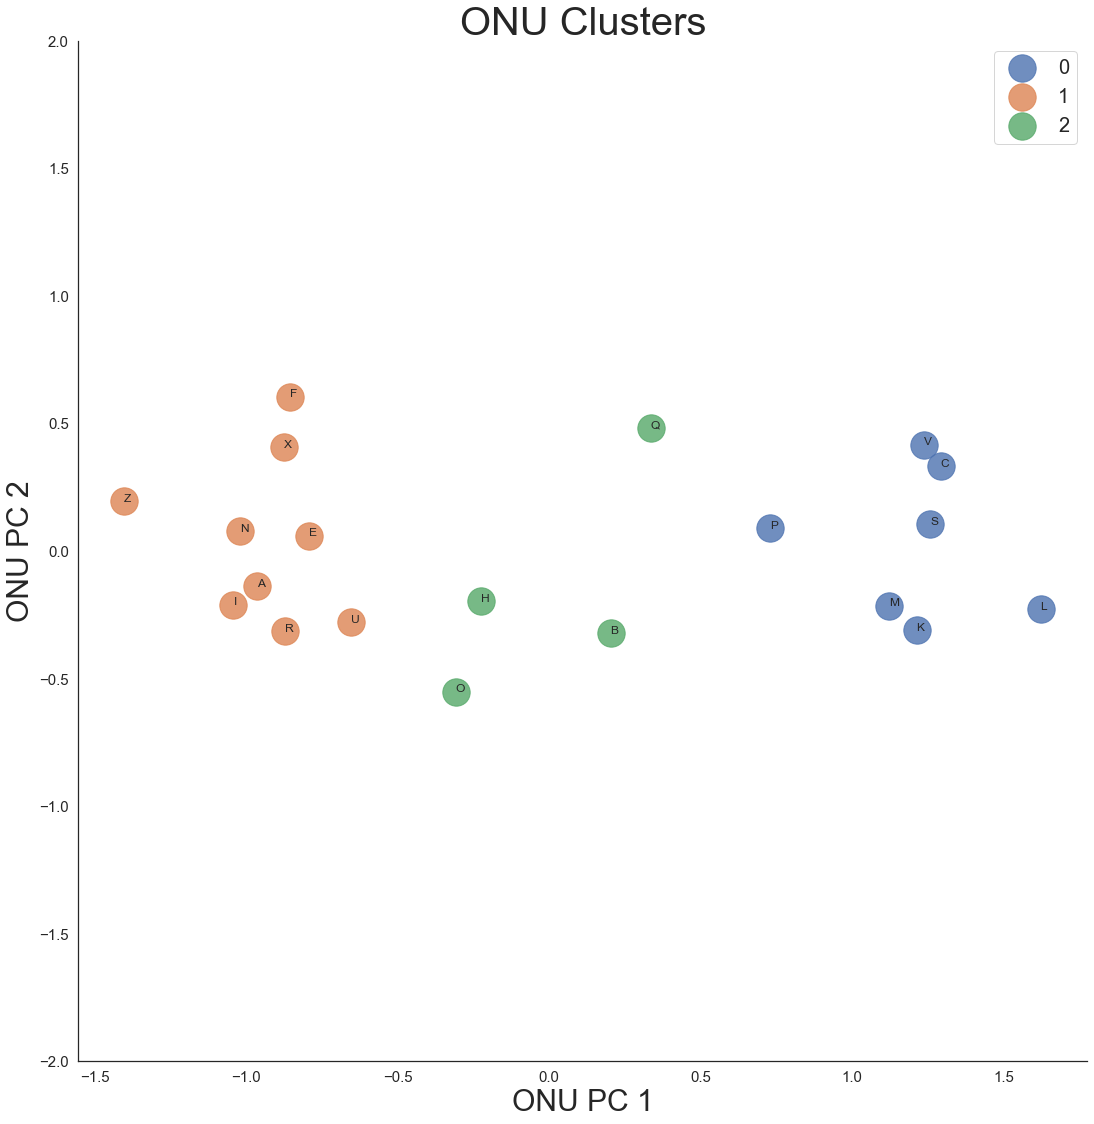

In [20]:
%matplotlib inline
sns.set(style="white")
ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced_ONU, legend= False,
fit_reg=False, height = 15, scatter_kws={"s": 750})
texts = []
for x, y, s in zip(reduced_ONU.x, reduced_ONU.y, reduced_ONU.names):
    texts.append(plt.text(x, y, s))
ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("ONU PC 1", fontsize = 30)
plt.ylabel("ONU PC 2", fontsize = 30)
plt.title('ONU Clusters', fontsize=40)
plt.legend(fontsize = 20)
plt.show()

In [15]:
ONU_group_0 = reduced_ONU[(reduced_ONU['cluster'] == 0)]
ONU_group_0

# Postions: C(MF) S(MF) P(F) M(D) V(MF) K(D) L(D)

,x,y,cluster,names
0,1.293584,0.332409,0,C
1,1.257907,0.104422,0,S
7,0.730116,0.089556,0,P
10,1.122722,-0.215273,0,M
14,1.237403,0.415452,0,V
15,1.212746,-0.309691,0,K
17,1.624439,-0.227568,0,L


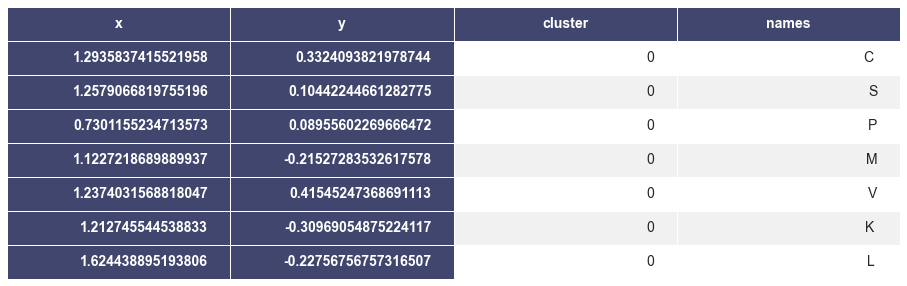

In [22]:
import six
df = ONU_group_0


def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(df, header_columns= 2, col_width=4)

In [16]:
ONU_group_1 = reduced_ONU[(reduced_ONU['cluster'] == 1)]
ONU_group_1
# Positions: A(D) Z(F) I(F) X(GK) R(D) F(GK) E(MF) U(MF) N(F)

,x,y,cluster,names
2,-0.964114,-0.138553,1,A
4,-1.403407,0.195146,1,Z
5,-1.042864,-0.210405,1,I
8,-0.875946,0.407537,1,X
9,-0.873487,-0.314229,1,R
11,-0.854785,0.605129,1,F
16,-0.794162,0.059338,1,E
18,-0.654728,-0.279750,1,U
19,-1.021421,0.077653,1,N


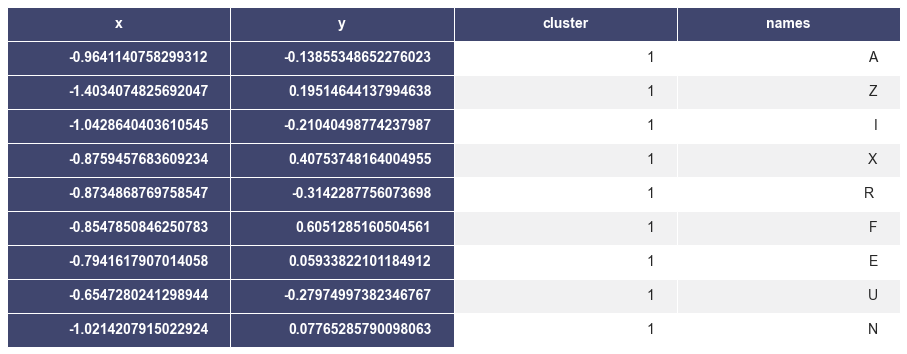

In [23]:
df = ONU_group_1


def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(df, header_columns= 2, col_width=4)

In [17]:
ONU_group_2 = reduced_ONU[(reduced_ONU['cluster'] == 2)]
ONU_group_2
# Postions Q(MF) O(F) H(F) B(F)

,x,y,cluster,names
3,0.335223,0.480999,2,Q
6,-0.308768,-0.551631,2,O
12,-0.225108,-0.197746,2,H
13,0.204652,-0.322797,2,B


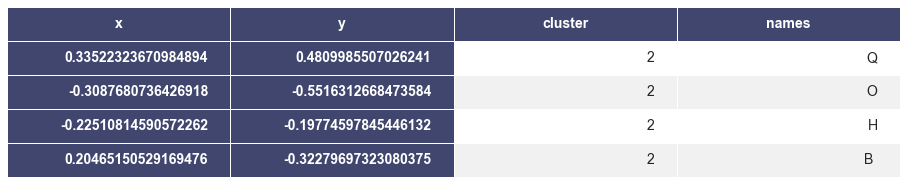

In [24]:
df = ONU_group_2


def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(df, header_columns= 2, col_width=4)